# 5.0 Interaction Analysis

### Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import re

sns.set(style="darkgrid")

### Data

In [2]:
support=pd.read_csv('./support_data.csv')
support.head()

,InteractionID,CustomerID,InteractionType,InteractionDate,InteractionContent
0,d15e050d-7d63-4c35-b6c7-a94ca4c37591,e40aaaca-f9b4-45eb-bc9b-99e48f2ed7b0,Chat,2023-07-17 21:34:27,I need to return an item.
1,fedad40e-fc8a-43a7-a2fb-42812a2a1e6f,80635f9a-f344-44a2-948f-fa761567c63f,Phone Call,2023-11-14 08:19:42,I accidentally placed the wrong order. Can it ...
2,a86d4f6a-a3df-4c3b-97a5-5e3f68a5a9fd,dc7d551d-c991-4310-932f-7ce5b742e999,Phone Call,2023-12-18 16:25:29,"The product manual is unclear, can you provide..."
3,d20f5780-9b10-4db7-93d9-27c882129024,eabb747a-6218-4e30-8035-557983ce5511,Phone Call,2023-04-18 15:16:06,I am experiencing issues with the app.
4,cc02f330-7e41-477d-bf6d-5be3e24e49b5,29519f8f-782d-41fc-9f6a-79f28d13942d,Chat,2023-02-19 15:35:03,The website is not working properly for me.


### Data (Overview, cleaning, description)

In [3]:
support.shape[0]

2000

In [4]:
support.describe()

,InteractionID,CustomerID,InteractionType,InteractionDate,InteractionContent
count,2000,2000,2000,2000,2000
unique,2000,2000,3,2000,32
top,d15e050d-7d63-4c35-b6c7-a94ca4c37591,e40aaaca-f9b4-45eb-bc9b-99e48f2ed7b0,Chat,2023-07-17 21:34:27,The product I purchased is out of stock. What ...
freq,1,1,678,1,76


In [5]:
support.isnull().sum()

InteractionID         0
CustomerID            0
InteractionType       0
InteractionDate       0
InteractionContent    0
dtype: int64

- The data has 2000 entries which are all unique and complete

 ## 5.1 Exploration and visualization

##### Word use count

In [6]:
# Function to count words in a given text (excluding punctuation)
def word_count(text):
    words = re.findall(r'\b\w+\b', str(text))   # Use regex to find words
    return len(words)
support['wordcount'] = support['InteractionContent'].apply(word_count)
support.head(2)


,InteractionID,CustomerID,InteractionType,InteractionDate,InteractionContent,wordcount
0,d15e050d-7d63-4c35-b6c7-a94ca4c37591,e40aaaca-f9b4-45eb-bc9b-99e48f2ed7b0,Chat,2023-07-17 21:34:27,I need to return an item.,6
1,fedad40e-fc8a-43a7-a2fb-42812a2a1e6f,80635f9a-f344-44a2-948f-fa761567c63f,Phone Call,2023-11-14 08:19:42,I accidentally placed the wrong order. Can it ...,10


##### Time Data Extraction

In [7]:
support['InteractionDate']=pd.to_datetime(support['InteractionDate'])

support['Year'] = support['InteractionDate'].dt.year
support['Month'] = support['InteractionDate'].dt.month
support['Month_name'] = support['InteractionDate'].dt.month_name()
support['Time'] = support['InteractionDate'].dt.time

In [8]:
def get_time_of_day(x):
    if x >= pd.to_datetime('00:00:00').time() and x < pd.to_datetime('07:00:00').time():
        return 'Night'
    elif x >= pd.to_datetime('07:00:00').time() and x < pd.to_datetime('12:00:00').time():
        return 'Morning'
    elif x >= pd.to_datetime('12:00:00').time() and x < pd.to_datetime('18:00:00').time():
        return 'Afternoon'
    elif x >= pd.to_datetime('18:00:00').time() and x <= pd.to_datetime('23:59:59').time():
        return 'Evening'
    else:
        return 'dawn'


support['day_period'] = support['Time'].apply(get_time_of_day)

## 5.2 Visualization

##### Interaction Medium

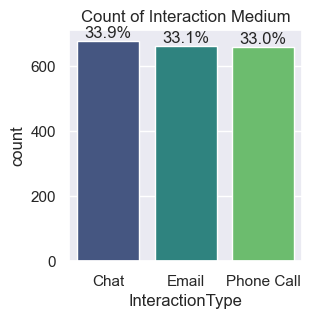

In [9]:
medium_data = support['InteractionType'].value_counts().sort_values(ascending=False)
types = medium_data.index

plt.figure(figsize =(3,3))
ax=sns.countplot(data = support, x = 'InteractionType', order=types, palette = 'viridis')
plt.title("Count of Interaction Medium")

total = len(support['InteractionType'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

###### Average Word count distribution by interaction type

  InteractionType  wordcount
0            Chat   8.991150
1           Email   8.992459
2      Phone Call   8.942337


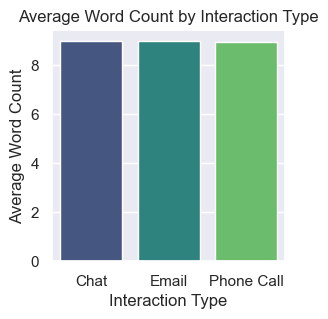

In [10]:
average_word_count_by_type = support.groupby('InteractionType')['wordcount'].mean().reset_index()
print(average_word_count_by_type)

plt.figure(figsize=(3, 3))
ax = sns.barplot(x='InteractionType', y='wordcount', data=average_word_count_by_type, palette = 'viridis')
ax.set(xlabel='Interaction Type', ylabel='Average Word Count')
plt.title('Average Word Count by Interaction Type')
plt.show()

##### Support provided by day period

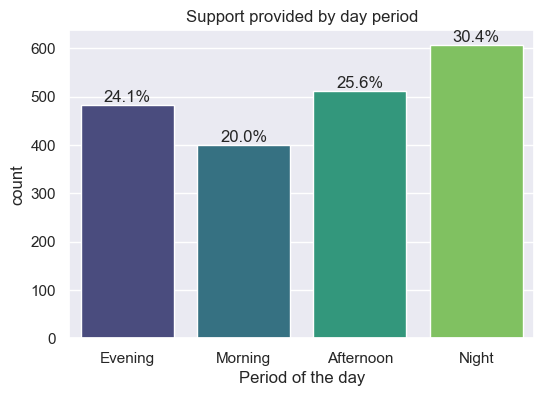

In [11]:

plt.figure(figsize=(6, 4))
ax=sns.countplot(data = support, x = 'day_period', palette = 'viridis')
plt.title("Support provided by day period")
plt.xlabel('Period of the day')

total = len(support['day_period'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

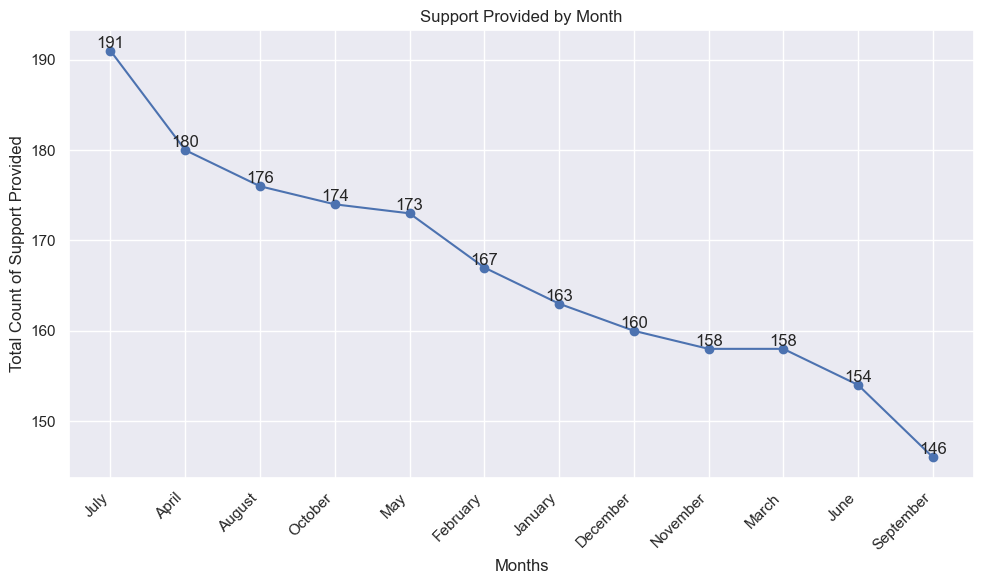

In [12]:
# Calculate support provided by month
monthly_support = support['Month_name'].value_counts().sort_values(ascending=False)
month_names = monthly_support.index

plt.figure(figsize=(10, 6))
plt.plot(month_names, monthly_support, marker='o', color='b', linestyle='-')

# Add annotations
for month, count in zip(month_names, monthly_support):
    plt.text(month, count, str(count), ha='center', va='bottom')

plt.xlabel('Months')
plt.ylabel('Total Count of Support Provided')
plt.title('Support Provided by Month')
plt.xticks(rotation=45, ha='right')
plt.grid(True)
plt.tight_layout()
plt.show()


## 5.3 Words Processing

##### Frequent Word count

In [13]:
import nltk
from nltk.corpus import stopwords

support['InteractionContent'] = support['InteractionContent'].str.replace("[^\w\s]", "").str.lower()
stop = set(stopwords.words('english'))

# Apply the stopword removal to the 'InteractionContent' column
support['InteractionContent'] = support['InteractionContent'].apply(lambda x: ' '.join([item for item in x.split() if item not in stop]))
word_freq_df = pd.DataFrame(support['InteractionContent'].str.split(expand=True).stack().value_counts())
word_freq_df.head(5)

,count
product,516
received,269
need,252
provide,234
want,189


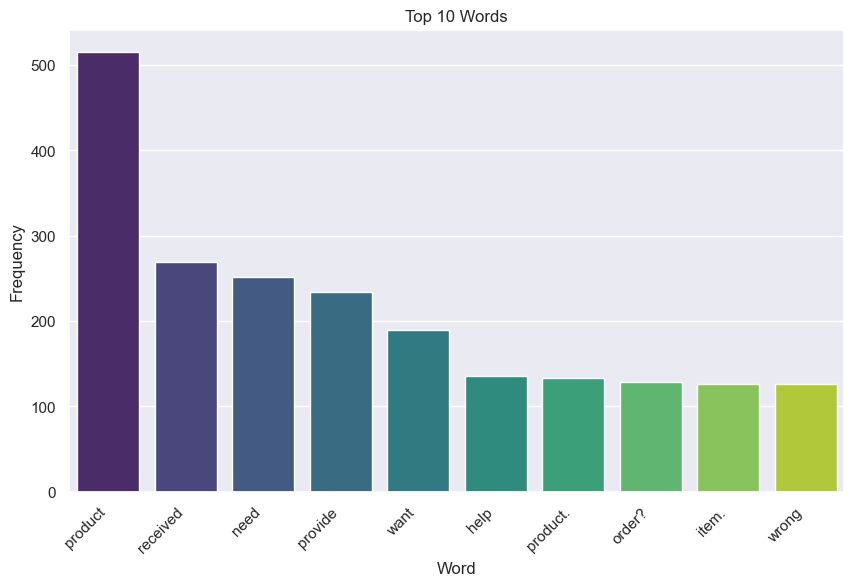

In [14]:
word_freq_df.reset_index(inplace=True)
word_freq_df.columns = ['Word', 'Frequency']

# Sort the DataFrame by frequency in descending order
word_freq_df = word_freq_df.sort_values(by='Frequency', ascending=False)

# Plot the top N words by frequency
top_n = 10
plt.figure(figsize=(10, 6))
ax = sns.barplot(x='Word', y='Frequency', data=word_freq_df.head(top_n), palette ='viridis')
ax.set(xlabel='Word', ylabel='Frequency')
plt.title(f'Top {top_n} Words')
plt.xticks(rotation=45, ha='right');

##### Word Cloud

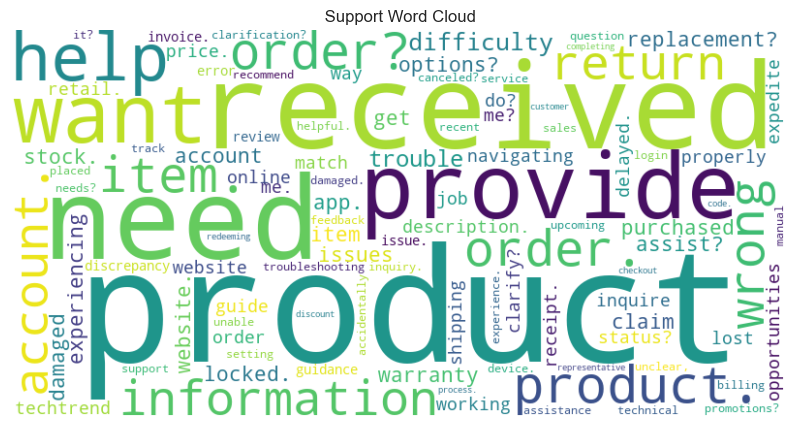

In [16]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Assuming you have a DataFrame 'word_freq_df' with columns 'Word' and 'Frequency'
# Replace 'Word' and 'Frequency' with your actual column names

# Create a WordCloud object
wordcloud = WordCloud(width=800, height=400, background_color='white').generate_from_frequencies(word_freq_df.set_index('Word')['Frequency'])

# Display the WordCloud
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title(' Support Word Cloud')
plt.show()


# 6.0 Observations, Recommendations and Conclusions

----
To enhance customer experience we need to anticipate customer need and make them available, ready and waiting even before customers think they need it.

Hence, understanding customers habit based on their purchases, demographics and special requests is the best way to understand and create memorable experience for customers.

To help TechTrend achieve this with their customers we have delved into their data and came up with very valuable insights that will drive customer understanding, experience and business revenue as well.



#### Product sales Analysis
- The analysis reveals that the top-selling products are laptops, tablets, and headphones. Further insights from clustering shed light on which customers purchase these items the most. It was observed that the highest purchasers of these products are primarily located in Africa, Asia, and Europe (cluster 1).



- According to the World Economic Forum, Africa boasts the world's youngest population, with over 60% of the continent's inhabitants under the age of 25. Consequently, it is reasonable to infer that there exists a sizable untapped market in these regions. A tailored marketing strategy designed to address the specific needs and preferences of this cluster could lead to a better customer experience and increased revenue for the business.



#### Region
- Locations categorized as territories, islands, or small states dominate the product purchase landscape, followed closely by Africa, Asia, and Europe. Customers from these regions, particularly small islands, play a crucial role in driving company revenue. Therefore, understanding their product preferences and ensuring product availability at all times is paramount.


- Two distinct clusters can be identified within this region: cluster 0 and cluster 2. In cluster 0, the predominant purchases are laptops followed by tablets. This underscores the importance of prioritizing the availability of these products in this region over others. Conversely, cluster 2 demonstrates frequent purchases of three product types: laptops, headphones, and smartphones. Consequently, these products should be heavily promoted in this region to capitalize on customer demand.


#### Times of product sale
- The analysis revealed a notable trend: more products are sold during the night than at any other time of the day. When considering the timing of purchases, customers in cluster 1 and cluster 2 emerge as the most active night-time purchasers. Therefore, beyond addressing product needs based on geographical regions, it is imperative to optimize product availability according to the time of day.


- For physical stores in these regions, adjusting opening and closing times to align with customer purchasing patterns may enhance customer satisfaction and increase sales. For example, since customers in cluster 2 primarily purchase at night and in the evening, adjusting store hours to accommodate these peak purchasing times could lead to higher sales volume. Similarly, customers in cluster 1 exhibit a preference for night-time purchases, followed by evening, afternoon, and morning purchases. In contrast, customers in cluster 0 tend to make purchases during the morning and afternoon periods.


#### Support Service
- The analysis indicates that customers have numerous inquiries regarding their products, ranging from queries about delivery status to issues concerning lost or damaged items, troubleshooting, and website navigation. To enhance customer satisfaction and streamline the support process, it is imperative to develop a comprehensive FAQ section that addresses frequently encountered issues. By providing clear and concise answers to common questions, customers can find solutions to their queries more efficiently, leading to improved user experience and higher conversion rates.

- Furthermore, the data reveals that customer interactions with support services peak during the night. Given that this timeframe coincides with the highest sales and customer engagement periods, it is essential to allocate adequate support resources during this time. By ensuring that robust support services are readily available during peak hours, customers can seamlessly transition from browsing to purchase, payment, and delivery, thereby enhancing overall satisfaction and driving business growth.